# Работа с данными. Домашнее задание


## Задача
Имеется набор данных покупателей супермаркета. Проведите анализ и очистку этих данных.

### Описание данных

Дан файл Mall_Customers.csv, содержащий следующие данные по покупателям сети супермаркетов:
- CustomerID — идентификатор покупателя.
- Genre – пол покупателя.
- Age – возраст покупателя.
- Annual Income (k\$) – годовой доход покупателя, тысяч $.
- Spending Score (1–100) – рейтинг покупателя, целевая переменная.

### Задание 1

Загрузите данные из файла `Mall_Customers.csv` в ноутбук и выведите первые пять строк на экран.

In [1]:
import pandas as pd

### YOUR CODE HERE ###
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.0,15.0,39
1,2,Male,NaN,NaN,81
2,3,Female,NaN,16.0,6
3,4,Female,23.0,16.0,77
4,5,Female,31.0,17.0,40


### Задание 2

Проведите разведочный анализ загруженных данных. Обязательные атрибуты для анализа:
- количество пропусков в каждом признаке;
- распределения признаков;
- возможные выбросы или аномалии.

Анализ дополнительных атрибутов и свойств данных приветствуется. Используйте средства визуализации там, где это необходимо.

По результатам анализа сделайте выводы о свойствах отдельных признаков и качестве данных в целом.

In [2]:
### количество пропущенных значений
df.isnull().sum()

CustomerID                 0
Genre                     19
Age                       20
Annual Income (k$)        20
Spending Score (1-100)     0
dtype: int64

В данных есть пропуски:
- 19 пропусков в категории пол;
- 20 пропусков в категории возраст;
- 20 пропусков в категории годовой доход.

In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,180.000000,180.000000,200.000000
mean,100.500000,39.894444,5615.433333,50.200000
std,57.879185,16.842848,74531.115872,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,29.000000,42.000000,34.750000
50%,100.500000,36.000000,61.000000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,135.000000,1000000.000000,99.000000


In [4]:
numeric_columns = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]

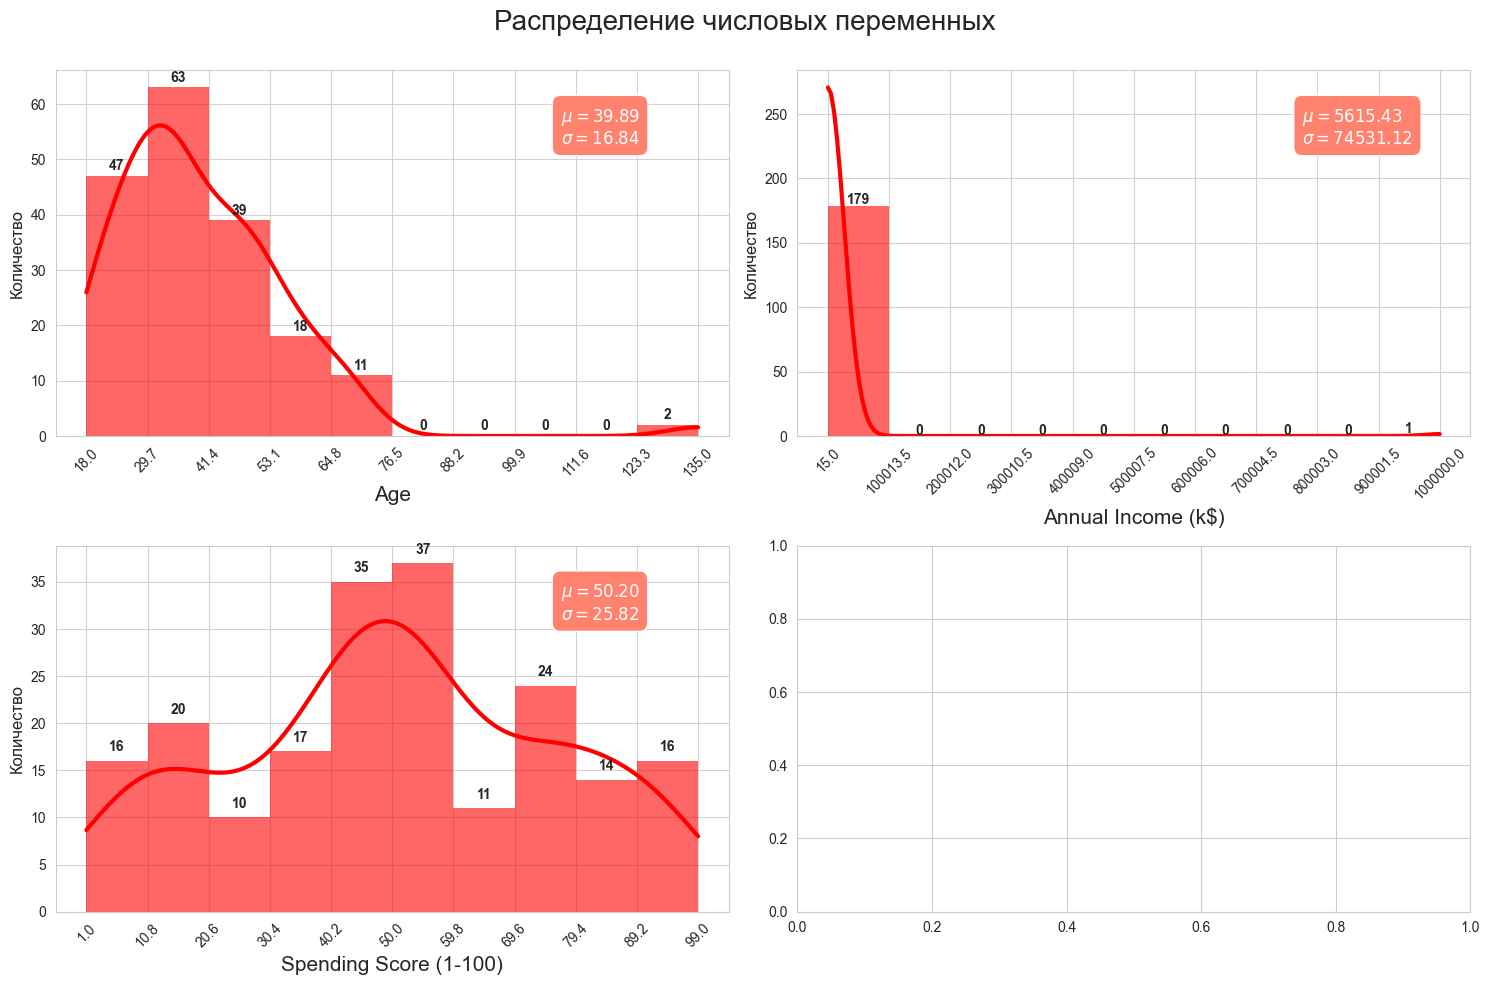

In [5]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Цикл для построения гистограмм для каждого числового признака
for i, col in enumerate(numeric_columns):
    x = i // 2
    y = i % 2
    values, bin_edges = np.histogram(df[col],
                                     range=(df[col].min(), df[col].max()))

    graph = sns.histplot(data=df, x=col, bins=bin_edges, kde=True, ax=ax[x, y],
                         edgecolor='none', color='red', alpha=0.6, line_kws={'lw': 3})
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Количество', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')

    for j, p in enumerate(graph.patches):
        ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                          ha='center', fontsize=10, fontweight="bold")

    textstr = '\n'.join((
        r'$\mu=%.2f$' % df[col].mean(),
        r'$\sigma=%.2f$' % df[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

plt.suptitle('Распределение числовых переменных', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

Описательная статистика и графики показывают, чтов данных есть выбросы:
- 2 выброса в категории возраст, так как значения выше 130 лет;
- 1 выброс в колонке Annual Income.

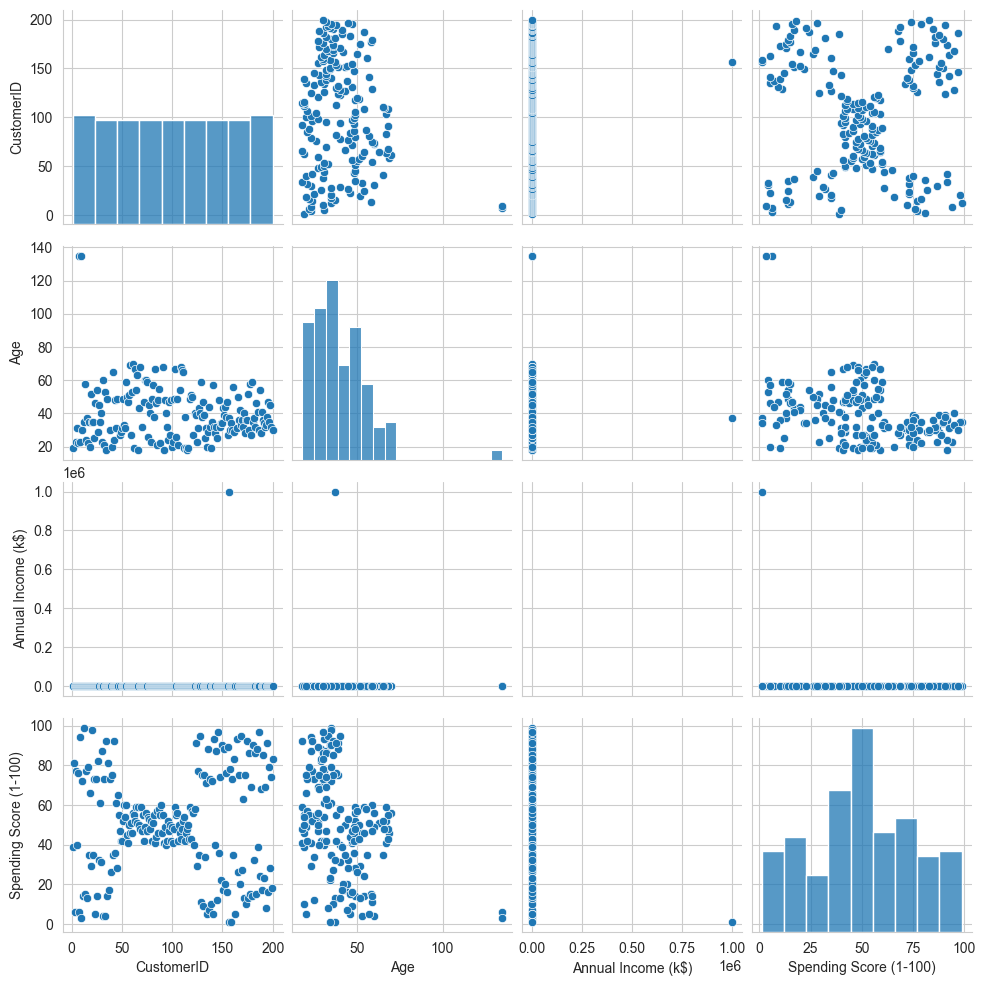

In [6]:
sns.pairplot(df)

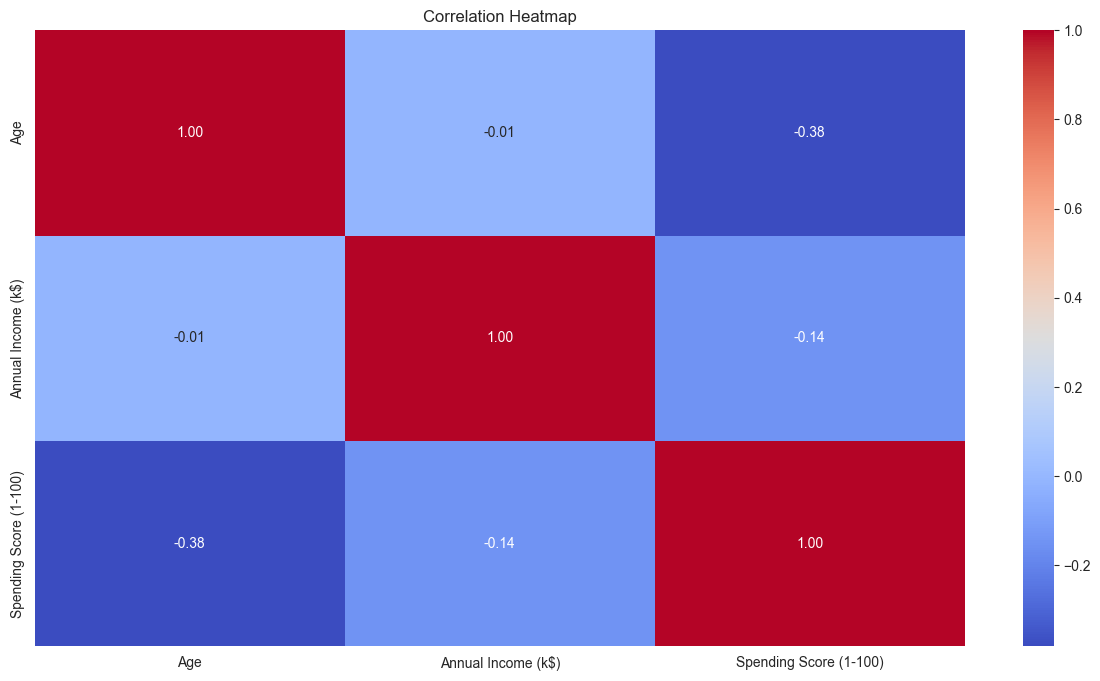

In [7]:
#Посчитаем матрицк корреляций между количественными признаками
correlation_matrix = df[numeric_columns].corr()  
# Heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [8]:
df.Genre.value_counts()

Genre
Female     102
Male        77
Feemale      2
Name: count, dtype: int64

Проанализировав каткгориальный признак пол, видно, что существуют 2 значения, относящиемя к категории Female, то есть есть опечатка в данных.

In [9]:
#Обработием эти два значения
def genre(data):
    if data == 'Feemale':
        return 'Female'
    return data

df['Genre'] = df['Genre'].apply(genre)
df.Genre.value_counts()

Genre
Female    104
Male       77
Name: count, dtype: int64

In [10]:
len(df.CustomerID.value_counts())

200

Данные по каждому клиенту уникальны, повторяющихся значений нет

### Задание 3

Разделите данные на обучающую и тестовую выборки в пропорции 80:20. Здесь и далее используйте random_state = 1.

In [11]:
### YOUR CODE HERE ###
from sklearn.model_selection import train_test_split


Train, Test = train_test_split(df, test_size=0.2, random_state=1)

### Задание 4

Заполните пропуски в признаках в обучающей выборке с использованием инструментов sklearn. Для каждого признака выберите и аргументируйте стратегию заполнения пропусков.

In [12]:
Train.isnull().sum()

CustomerID                 0
Genre                     15
Age                       15
Annual Income (k$)        18
Spending Score (1-100)     0
dtype: int64

Посчитаем сколько пропусков по каждой записи, если пропусков от 2 и более в строке (то есть 50% данных и выше), то строку удаляем

In [13]:
Train['nan_count'] = Train.isnull().sum(axis=1)
Train = Train[Train['nan_count'] <= 1]  
Train.drop(['nan_count'], axis=1, inplace=True)
Train.isnull().sum()

CustomerID                 0
Genre                     12
Age                       12
Annual Income (k$)        14
Spending Score (1-100)     0
dtype: int64

Заполним пропуски в колонке Annual Income.
- Для создадим новую колонку age_cat (диапазон возраста)
- Создадим словарь - где ключом будет (Пол, диапазон возраста), а значение средний доход у данной группы

In [14]:
#Заполнение пропусков в категории возраст
Train['Age_cat'] = 0
def age_cat(data):
    if data < 18:
        return 18
    elif data < 25:
        return 25
    elif data < 30:
        return 30
    elif data < 40:
        return 40
    elif data < 50:
        return 50
    elif data < 60:
        return 60
    else:
        return 70
    
Train['Age_cat'] = Train['Age'].apply(age_cat)
Train['Age_cat'].value_counts()

Age_cat
40    42
50    32
25    26
70    25
60    17
30    13
Name: count, dtype: int64

In [73]:
mean_dict = Train.groupby(['Genre','Age_cat'])['Annual Income (k$)'].mean()
for i, row in Train.iterrows():
    if str(row['Annual Income (k$)']) == 'nan':
        annual_income = mean_dict[(row['Genre'], row['Age_cat'])]
        Train.at[i, 'Annual Income (k$)'] = annual_income

Train
        

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Age_cat
108,109,Male,68.0,63.0,43,70
107,108,Male,54.0,63.0,46,60
189,190,Female,36.0,103.0,85,40
14,15,Male,37.0,20.0,13,40
56,57,NaN,51.0,44.0,50,60
...,...,...,...,...,...,...
133,134,Female,31.0,72.0,71,40
137,138,Male,32.0,73.0,73,40
72,73,Female,60.0,50.0,49,70
140,141,Female,57.0,75.0,5,60


In [74]:
Train.isnull().sum()

CustomerID                 0
Genre                     12
Age                       12
Annual Income (k$)         0
Spending Score (1-100)     0
Age_cat                    0
dtype: int64

Далее заполним колонки Genre и Age.
- Age заполним, как медиана в соответствии с гендером;
- Genre заполним в соответвтсии в Annual Income

In [83]:
median_age_genre = Train.groupby(['Genre']).Age.median()
Female_age = median_age_genre['Female']
Male_age = median_age_genre['Male']

Train['Age'].fillna(Train['Genre'].apply(lambda x: Male_age if x == 'Male' else Female_age), inplace=True)
Train.isnull().sum()

CustomerID                 0
Genre                     12
Age                        0
Annual Income (k$)         0
Spending Score (1-100)     0
Age_cat                    0
dtype: int64

In [88]:
Train.groupby(['Genre'])['Annual Income (k$)'].mean()

Genre
Female       61.595229
Male      16289.822314
Name: Annual Income (k$), dtype: float64

Видим, что на расчет среднеарифметического дохода сильно вляют выбросы, поэтому избавимся от них сейчас

### Задание 5

Найдите выбросы в признаках обучающей выборки. Замените выбросы, если таковые имеются, и аргументируйте выбор метода поиска выбросов.


In [89]:
### YOUR CODE HERE ###
Train['Annual Income (k$)'].sort_values(ascending=False)[:5]

156    1000000.0
192      71496.0
199        137.0
196        126.0
197        126.0
Name: Annual Income (k$), dtype: float64

In [91]:
Train = Train[Train['Annual Income (k$)'] < 140]
Train['Annual Income (k$)'].sort_values(ascending=False)[:5]

199    137.0
196    126.0
197    126.0
195    120.0
189    103.0
Name: Annual Income (k$), dtype: float64

Удалим строки со значениями выше 140

In [92]:
Train['Age'].sort_values(ascending=False)[:5]

6     135.0
8     135.0
60     70.0
57     69.0
90     68.0
Name: Age, dtype: float64

Удалим строки со занчениями выше 100

In [93]:
Train = Train[Train['Age'] < 100]
Train['Age'].sort_values(ascending=False)[:5]

60     70.0
57     69.0
108    68.0
67     68.0
90     68.0
Name: Age, dtype: float64

In [95]:
genre_income = Train.groupby(['Genre'])['Annual Income (k$)'].mean()
boundary = (genre_income['Male'] + genre_income['Female']) / 2
boundary

np.float64(59.474382329196)

Boundary - граница, по котрой будем определять пол в соответствии с доходом

In [96]:
Train['Genre'].fillna(Train['Annual Income (k$)'].apply(lambda x: 'Female' if x <= boundary else 'Male'), inplace=True)
Train['Genre'].value_counts()

Genre
Female    82
Male      69
Name: count, dtype: int64

### Задание 6

Нормализуйте численные признаки. Аргументируйте выбор стратегии нормализации для каждого признака.


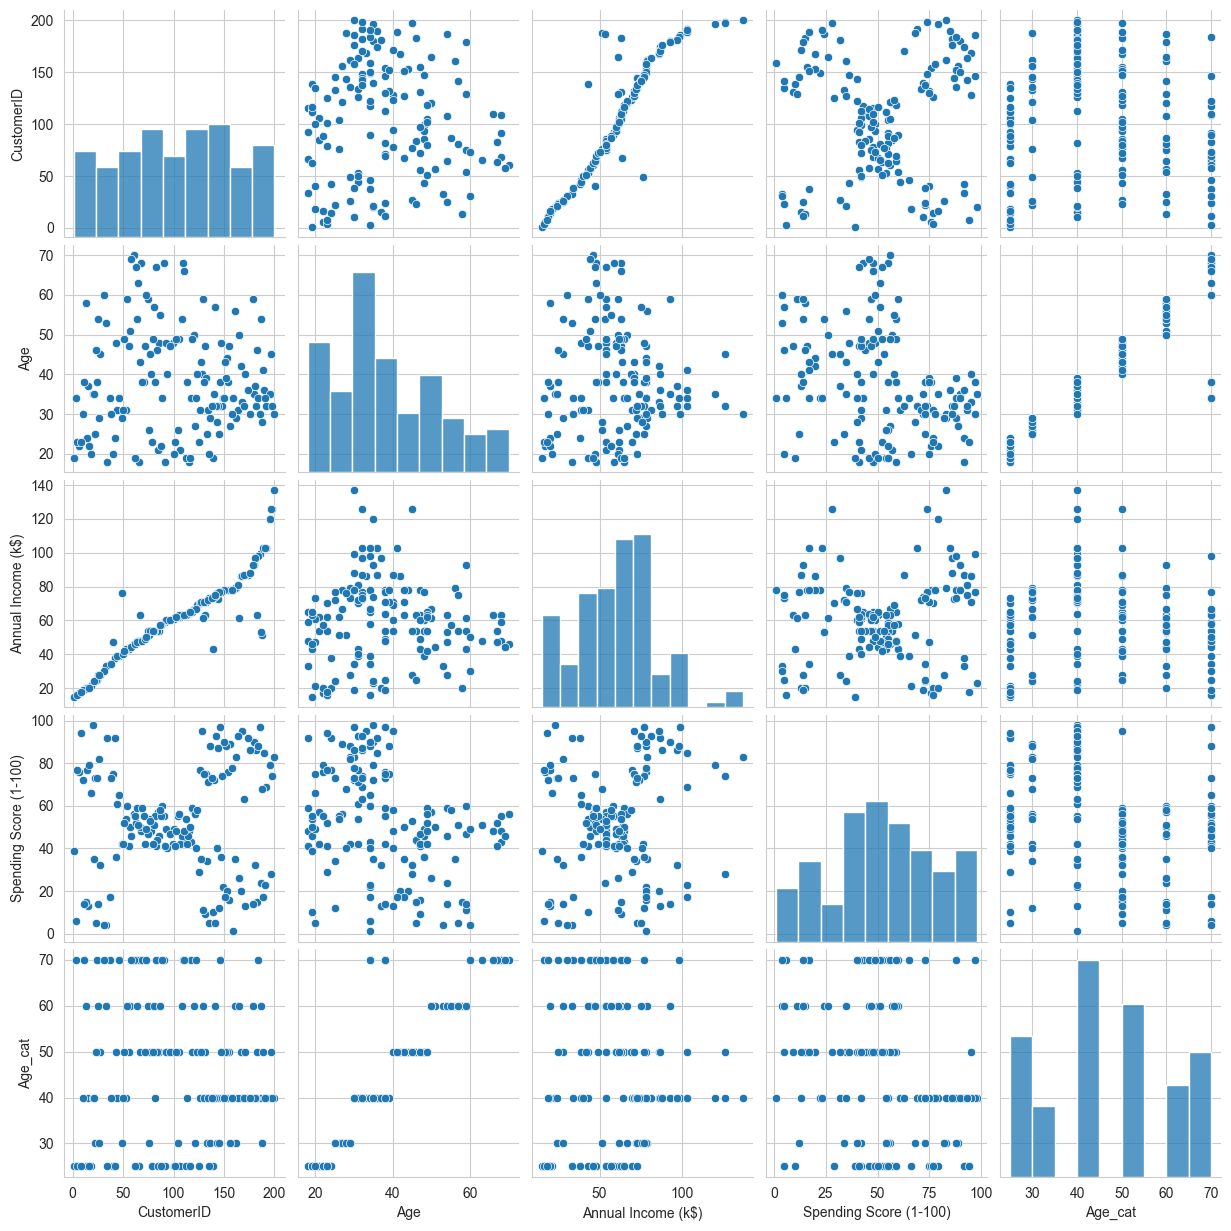

In [97]:
### YOUR CODE HERE ###
sns.pairplot(Train)

В общем случае, данные не распределены нормально, поэтому лучше использовать MinMAxScaler, но сначала закодируем категориальные признаки

### Задание 7

Закодируйте категориальные признаки в обучающей выборке. Аргументируйте выбор способа кодирования.

В данном датасете всего 1 категориальный признак - пол, его можно закодировать в числовой бинарный признак, где Male = 1, Female = 0

In [102]:
### YOUR CODE HERE ###
Train['Genre_'] = Train['Genre'].apply(lambda x: 0 if x == 'Female' else 1)
Train.drop(['Genre'], axis=1, inplace=True)

In [103]:
from sklearn.preprocessing import MinMaxScaler

Train_Scaler = MinMaxScaler().fit(Train)

### Задание 8
Проведите очистку и подготовку тестовых данных. Используйте препроцессоры и другие инструменты, которые вы уже использовали при подготовке обучающей выборки, без их дополнительной настройки.

In [104]:
### YOUR CODE HERE ###
Test['Age_cat'] = 0
def age_cat(data):
    if data < 18:
        return 18
    elif data < 25:
        return 25
    elif data < 30:
        return 30
    elif data < 40:
        return 40
    elif data < 50:
        return 50
    elif data < 60:
        return 60
    else:
        return 70
    
Test['Age_cat'] = Test['Age'].apply(age_cat)

In [105]:
mean_dict = Test.groupby(['Genre','Age_cat'])['Annual Income (k$)'].mean()
for i, row in Test.iterrows():
    if str(row['Annual Income (k$)']) == 'nan':
        annual_income = mean_dict[(row['Genre'], row['Age_cat'])]
        Test.at[i, 'Annual Income (k$)'] = annual_income

In [107]:
median_age_genre = Test.groupby(['Genre']).Age.median()
Female_age = median_age_genre['Female']
Male_age = median_age_genre['Male']

Test['Age'].fillna(Test['Genre'].apply(lambda x: Male_age if x == 'Male' else Female_age), inplace=True)

In [112]:
Test = Test[Test['Annual Income (k$)'] < 140]
Test = Test[Test['Age'] < 100]
Test['Genre'].fillna(Test['Annual Income (k$)'].apply(lambda x: 'Female' if x <= boundary else 'Male'), inplace=True)
Test['Genre_'] = Test['Genre'].apply(lambda x: 0 if x == 'Female' else 1)
Test.drop(['Genre'], axis=1, inplace=True)

In [113]:
Test_Scaler = MinMaxScaler().fit(Test)